# Loan Prediction

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
#loading dataset
df = pd.read_csv("B04_Home_loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data preprocessing

<AxesSubplot:>

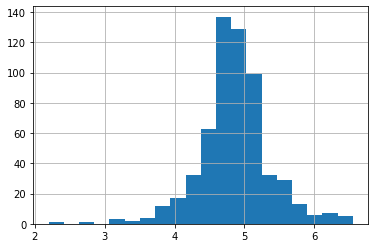

In [6]:
#To remove the skewness due to outliers, we use log transformation to get a normal distribution.
df['loanAmount_log']= np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


<AxesSubplot:>

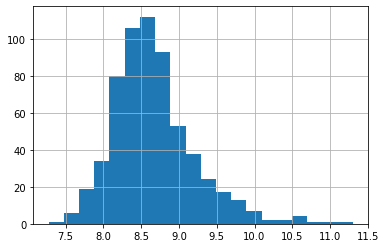

In [8]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [9]:
# filling the null values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)


df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Data Visualization

## univariate analysis

<AxesSubplot:>

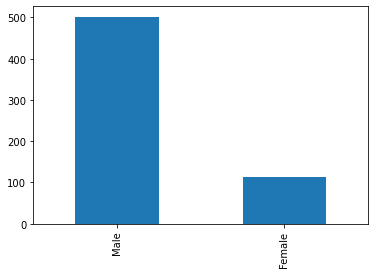

In [10]:
df.Gender.value_counts().plot(kind='bar')

<AxesSubplot:>

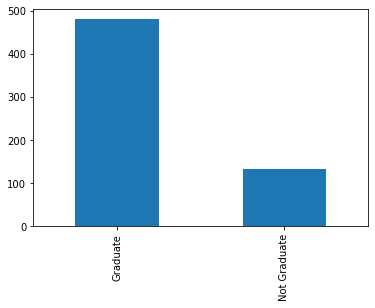

In [11]:
df.Education.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

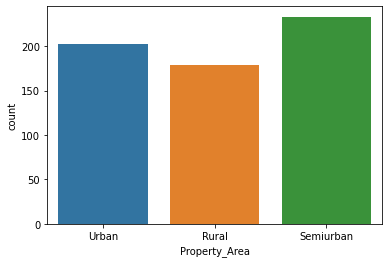

In [12]:
sns.countplot(x='Property_Area',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

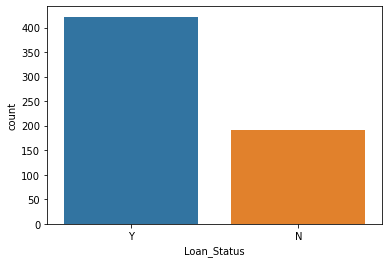

In [13]:
sns.countplot(x='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

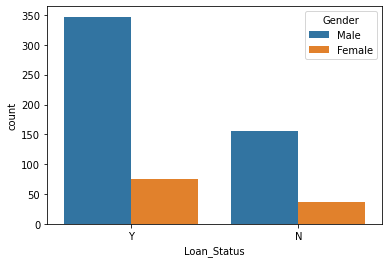

In [14]:
sns.countplot(x=df.Loan_Status,hue=df.Gender)

<AxesSubplot:>

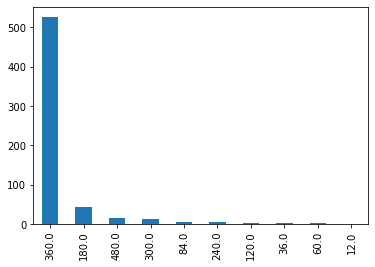

In [15]:
df.Loan_Amount_Term.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Married', ylabel='count'>

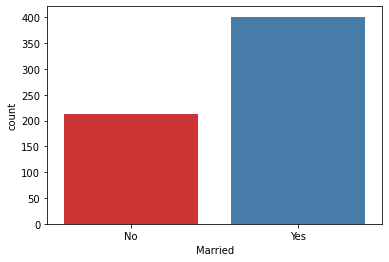

In [16]:
sns.countplot(x = 'Married', data=df, palette = 'Set1')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

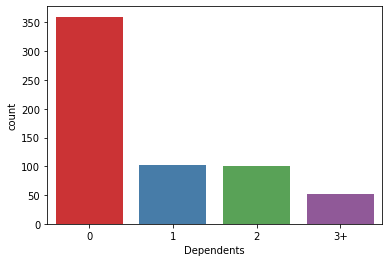

In [17]:
sns.countplot(x = 'Dependents', data=df, palette = 'Set1')

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

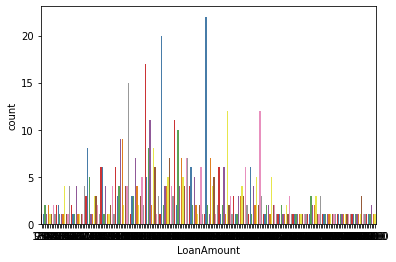

In [18]:
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount', data=df, palette = 'Set1')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

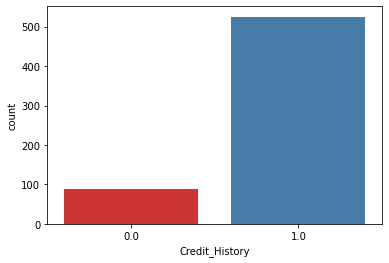

In [19]:
sns.countplot(x = 'Credit_History', data=df, palette = 'Set1')

([<matplotlib.patches.Wedge at 0x22bad636f40>,
 [Text(-0.5210279395193431, 0.9687775215395059, 'Urban'),
  Text(-0.14880903459988948, -1.0898880085685176, 'Rural'),
  Text(1.086598312664751, 0.17118442369011413, 'Semiurban')])

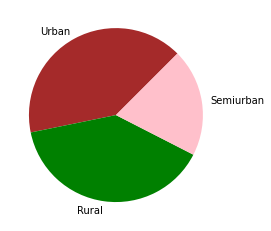

In [20]:
labels = 'Urban', 'Rural', 'Semiurban'
colors = ['brown', 'green', 'pink']
area =  [311, 300, 153]

plt.pie(area, colors = colors, labels = labels,startangle=45)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

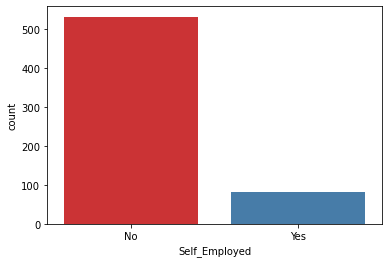

In [21]:
sns.countplot(x = 'Self_Employed', data=df, palette = 'Set1')

# Bi-variate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

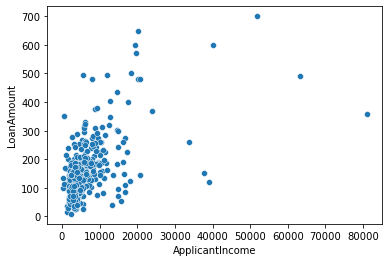

In [22]:
sns.scatterplot(x=df.ApplicantIncome,y=df.LoanAmount)

In [23]:
x = pd.DataFrame(pd.crosstab(df.Education,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Education,,,,
Graduate,140,340,480,70.833333
Not Graduate,52,82,134,61.194030


In [24]:
x = pd.DataFrame(pd.crosstab(df.Gender,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Gender,,,,
Female,37,75,112,66.964286
Male,155,347,502,69.123506


In [25]:
x = pd.DataFrame(pd.crosstab(df.Married,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Married,,,,
No,79,134,213,62.910798
Yes,113,288,401,71.820449


In [26]:
x = pd.DataFrame(pd.crosstab(df.Credit_History,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Credit_History,,,,
0.0,82,7,89,7.865169
1.0,110,415,525,79.047619


In [27]:
x = pd.DataFrame(pd.crosstab(df.Self_Employed,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Self_Employed,,,,
No,166,366,532,68.796992
Yes,26,56,82,68.292683


In [28]:
x = pd.DataFrame(pd.crosstab(df.Property_Area,df.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Property_Area,,,,
Rural,69,110,179,61.452514
Semiurban,54,179,233,76.824034
Urban,69,133,202,65.841584


<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

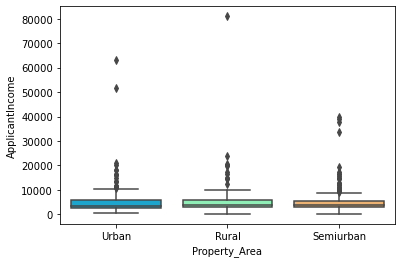

In [49]:
sns.boxplot(x='Property_Area',y='ApplicantIncome',data=df,palette='rainbow')

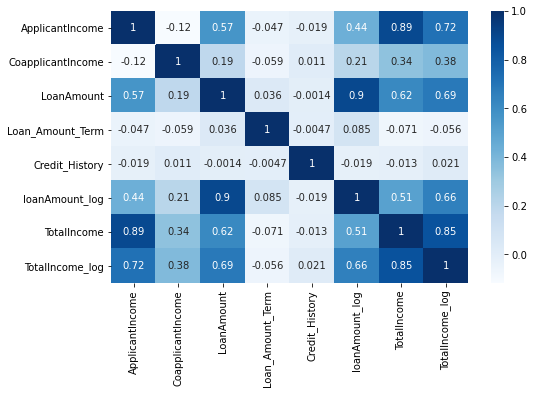

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='Blues',annot = True)
plt.show()

In [30]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'loanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [31]:
x = df.iloc[:, np.r_[1:5,9:11,13:15]].values # gender,married,dependents, education, loan_amount_term,credit_history, loanAmount_log
# totalIncome
y = df.iloc[:,12].values

x


array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [33]:
for i in range(0,5):
    X_train[:,i] = le.fit_transform(X_train[:,i])
    X_train[:,7] = le.fit_transform(X_train[:,7])
    

X_train    

array([[1, 1, 1, ..., 1.0, 3.784189633918261, 235],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 155],
       [1, 0, 2, ..., 1.0, 5.087596335232384, 372],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 343],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 258],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 285]], dtype=object)

In [34]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [37]:
#test data training

for i in range(0,5):
    X_test[:,i] = le.fit_transform(X_test[:,i])
    X_test[:,7] = le.fit_transform(X_test[:,7])
X_test

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 105],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 38],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 127],
       ...,
       [1, 1, 0, ..., 1.0, 4.912654885736052, 132],
       [1, 0, 0, ..., 1.0, 4.882801922586371, 83],
       [1, 1, 1, ..., 0.0, 4.795790545596741, 44]], dtype=object)

In [38]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

In [40]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
models=[]
#models.append(("linear discriminative analysis",LinearDiscriminantAnalysis()))
models.append(("logistic reg",LogisticRegression()))
models.append(("decision tree",DecisionTreeClassifier()))
models.append(("random forest",RandomForestClassifier()))
#models.append(("svc",SVC()))
models.append(("kneighbors",KNeighborsClassifier()))
models.append(("gaussianNB",GaussianNB()))

In [42]:
seed=7
scoring='accuracy'

In [43]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [44]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=None)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logistic reg 0.802174 0.052759
decision tree 0.706522 0.058534
random forest 0.771739 0.050751
kneighbors 0.760870 0.042377
gaussianNB 0.797826 0.052400


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(X_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8311688311688312
[[ 19  24]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154

